In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [25]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [26]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('/Users/Yashaswi/Downloads/cats_dogs/train/dogs/dog.100.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/Users/Yashaswi/Downloads/preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [28]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/Users/Yashaswi/Downloads/cats_dogs/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/Users/Yashaswi/Downloads/cats_dogs/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [30]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try2.h5')  # always save your weights after training or during training

Epoch 1/5
125/125 [==============================] - 111s 888ms/step - loss: 0.7080 - acc: 0.5285 - val_loss: 0.6826 - val_acc: 0.5000
Epoch 2/5
125/125 [==============================] - 100s 797ms/step - loss: 0.6747 - acc: 0.6115 - val_loss: 0.6488 - val_acc: 0.6425
Epoch 3/5
125/125 [==============================] - 105s 844ms/step - loss: 0.6329 - acc: 0.6580 - val_loss: 0.5975 - val_acc: 0.6725
Epoch 4/5
125/125 [==============================] - 129s 1s/step - loss: 0.5926 - acc: 0.6820 - val_loss: 0.6213 - val_acc: 0.6475
Epoch 5/5
125/125 [==============================] - 121s 972ms/step - loss: 0.5961 - acc: 0.6995 - val_loss: 0.6239 - val_acc: 0.6425


In [9]:
#model.load_weights('first_try.h5')

In [41]:
img = load_img('/Users/Yashaswi/Downloads/cat_image.jpg')  # this is a PIL image
x = img_to_array(img.resize([150,150]))  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)


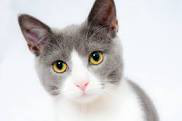

In [42]:
img

In [43]:
if (model.predict_classes(x)==1):
    print ("It is a DOG")
else:
    print ("It is a Cat")



It is a Cat


In [37]:
model.predict_classes(x)

array([[1]])